# 池化层

## 二维最大池化

- 返回滑动窗口中的最大值

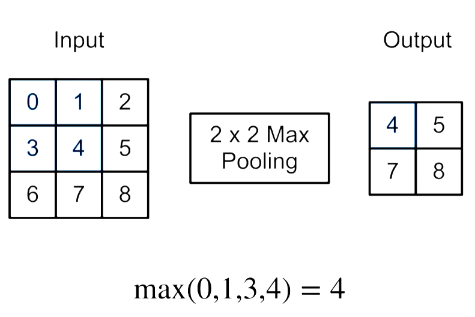

## 填充，步幅和多个通道
- 池化层与卷积层类似，都具有填充和步幅
- 没有可学习的参数
- 再每个输入通道应用池化层以获得相应的输出
- 输出通道数 = 输入通道数

## 池化层类别
- 最大池化层：每个窗口中最强的模式信号
- 平均池化层：将最大池化层的“最大”替换为“平均”

## 总结
- 池化层返回串口中最大或平均值
- 缓解卷积层对位置的敏感性
- 同样有窗口大小、填充和步幅作为超参数

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def pool2d(X, pool_size, mode= 'max'):
    """手动实现二维池化层函数"""
    p_h, p_w = pool_size
    #初始化Y矩阵
    Y = torch.zeros(X.shape[0]- p_h + 1, X.shape[1]- p_w + 1) 
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode ==  'max':
                Y[i, j] = X[i: i + p_h, j: j+p_w].max()
            elif mode ==  'avg':
                Y[i, j] = X[i: i + p_h, j: j+p_w].mean()
    return Y

In [3]:
X = torch.tensor([[0.0, 1.0, 2.0],
                  [3.0, 4.0, 5.0],
                  [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [4]:
#验证平均池化层
pool2d(X, (2, 2), mode='avg')

tensor([[2., 3.],
        [5., 6.]])

In [5]:
#结合填充和步幅
#可以通过改变填充和步幅来获得所需的输出形状(B, C, H, W)
X = torch.arange(16, dtype= torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [6]:
#调用nn模块,步幅形状为(3, 3)
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [10]:
#手动设定填充和步幅
pool2d = nn.MaxPool2d(3, padding= 1, stride= 2)
pool2d(X)
#手动设定任意大小的矩形窗口
pool2d = nn.MaxPool2d(3, padding=(0, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 9., 11.]]]])

In [16]:
#处理多通道输入数据
import numpy as np
X = np.concatenate((X, X+1), 1)
#转换为tensor张量形式
X = torch.tensor(X)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[ 2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9.],
          [10., 11., 12., 13.],
          [14., 15., 16., 17.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[ 2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9.],
          [10., 11., 12., 13.],
          [14., 15., 16., 17.]],

         [[ 2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9.],
          [10., 11., 12., 13.],
          [14., 15., 16., 17.]],

         [[ 3.,  4.,  5.,  6.],
          [ 7.,  8.,  9., 10.],
          [11., 12., 13., 

In [15]:
#池化之后输出通道的数量仍然是4
pool2d = nn.MaxPool2d(3, padding= 1, stride= 2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]],

         [[ 6.,  8.],
          [14., 16.]],

         [[ 7.,  9.],
          [15., 17.]]]])